In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
# This is the data file with diagnosis info (anonymized)
diagnosis = pd.read_csv('data/ppmi-2018-08-28/Prodromal_Diagnostic_Questionnaire.csv').set_index('PATNO')
diagnosis.head()

,REC_ID,F_STATUS,EVENT_ID,PAG_NAME,PRIMDIAG,OTHNEURO,PSLVL2,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV
PATNO,,,,,,,,,,,
10362,408770801,V,SC,PRODDIAG,17,NaN,4,08/2013,2013-08-23 11:37:07.0,NaN,08/2013
10405,605736601,V,SC,PRODDIAG,17,NaN,5,12/2016,2016-12-06 12:45:38.0,NaN,12/2016
10496,410987801,V,SC,PRODDIAG,23,NaN,5,09/2013,2013-09-05 11:40:13.0,NaN,09/2013
10606,409586301,S,SC,PRODDIAG,17,NaN,4,09/2013,2015-06-26 08:19:21.0,NaN,03/2015
10662,448326801,V,SC,PRODDIAG,17,NaN,5,07/2014,2014-07-16 08:08:30.0,NaN,07/2014


In [3]:
# This is the data file with diagnosis codes (anonymized)
codes = pd.read_csv('data/ppmi-2018-08-28/Code_List.csv')
codes.head()

,PAG_NAME,ITM_NAME,CDL_NAME,CODE,DECODE,LAST_UPDATE
0,AE,AEFLUP,YN,0,No,2010-12-06 07:13:10.0
1,AE,AEFLUP,YN,1,Yes,2010-12-06 07:13:10.0
2,AE,AEOUTCOM,AEOUTCOM,1,recovered,2010-12-06 07:13:10.0
3,AE,AEOUTCOM,AEOUTCOM,2,under treatment / observation,2010-12-06 07:13:10.0
4,AE,AEOUTCOM,AEOUTCOM,3,change in AE characteristic,2010-12-06 07:13:10.0


In [4]:
# Find all primary diagnosis codes and remove duplicates
codes = codes[codes['ITM_NAME']=='PRIMDIAG'][['CODE','DECODE']].groupby('CODE').first()
codes

,DECODE
CODE,
01,Idiopathic PD
02,Alzheimer's disease
03,Chromosome-17 frontotemporal dementia
04,Corticobasal degeneration
05,Dementia with Lewy bodies
06,Dopa-responsive dystonia
07,Essential tremor
08,Hemiparkinson/hemiatrophy syndrome
09,Juv. autosomal recessive parkinsonism


In [5]:
# Replace the numeric code in the diagnosis table with the text description above.
diagnosis['PRIMDIAG'] = diagnosis['PRIMDIAG'].map(lambda x:codes.loc['%.2d'%x,'DECODE'])

In [6]:
# This is the data file with smell test info
upsit = pd.read_csv('data/ppmi-2018-08-28/Olfactory_UPSIT.csv').set_index('SUBJECT_ID')
upsit.head()

,PROTOCOL_ID,COMPLT_DATE,SCENT_10_RESPONSE,SCENT_09_RESPONSE,SCENT_08_RESPONSE,SCENT_07_RESPONSE,SCENT_06_RESPONSE,SCENT_05_RESPONSE,SCENT_04_RESPONSE,SCENT_03_RESPONSE,...,SCENT_38_CORRECT,SCENT_37_CORRECT,SCENT_36_CORRECT,SCENT_35_CORRECT,SCENT_34_CORRECT,SCENT_33_CORRECT,SCENT_32_CORRECT,SCENT_31_CORRECT,TOTAL_CORRECT,UPSIIT_PRCNTGE
SUBJECT_ID,,,,,,,,,,,,,,,,,,,,,
90000,P-PPMI Cohort,04/2013,2,3,2,1,2,3,4,4,...,1,1,0,1,1,1,1,1,38,98
90001,P-PPMI Cohort,04/2013,2,3,2,1,2,3,4,4,...,1,0,1,1,0,1,0,1,30,36
90002,P-PPMI Cohort,03/2013,2,3,2,1,2,1,4,4,...,1,1,1,1,0,1,1,1,28,36
90003,P-PPMI Cohort,04/2013,3,1,1,4,2,4,3,2,...,0,0,0,0,0,0,0,0,8,0
90004,P-PPMI Cohort,04/2013,1,3,2,1,2,3,4,4,...,1,1,0,1,1,1,0,1,32,75


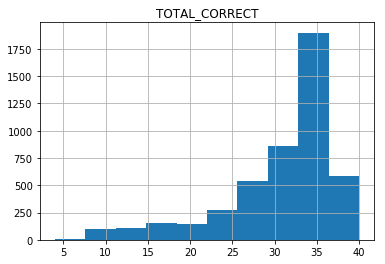

In [7]:
# Here is a histogram of total correct out of 40 for all of the subjects
upsit.hist('TOTAL_CORRECT');

In [8]:
# Merge the two tables using an inner join (only keep indices i.e. patient IDs that exist in both tables)
joined = upsit.join(diagnosis, how='inner')
print('There are %d patients common to both tables.' % joined.shape[0])

There are 407 patients common to both tables.


In [9]:
# Here is a break-down of the patient diagnoses (for all patients we have UPSIT data and diagnoses for).
joined['PRIMDIAG'].value_counts()

Prodromal non-motor PD                      215
No PD nor other neurological disorder       119
Prodromal motor PD                           35
Idiopathic PD                                33
Essential tremor                              2
Other neurological disorder(s) (specify)      2
Progressive supranuclear palsy                1
Name: PRIMDIAG, dtype: int64

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


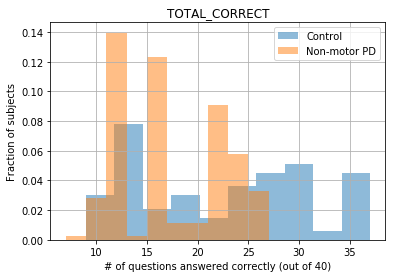

In [10]:
# Here are histograms of (non-motor) PD and controls.  
# You can see that the distributions overlap, but PD usually has worse smell.  
pro_nm_pd = joined[joined['PRIMDIAG']=='Prodromal non-motor PD']
control = joined[joined['PRIMDIAG']=='No PD nor other neurological disorder']
ax = control.hist('TOTAL_CORRECT', normed=True, alpha=0.5, label='Control');
pro_nm_pd.hist('TOTAL_CORRECT', ax=ax, normed=True, alpha=0.5, label='Non-motor PD');
plt.legend()
plt.xlabel('# of questions answered correctly (out of 40)')
plt.ylabel('Fraction of subjects');

In [11]:
# Here are all the columns in the joined table.  
# You can see that there are two columns for each of the 40 questions, one for what the response was, 
# and one for whether it is correct.  
# We should plan to try to predict the eventual diagnosis from this information.
# Eventually we want to incorporate time, so that we can predict future (years later) diagnoses
# from current UPSIT tests.  
#list(joined)

# Prepare Data

In [12]:
# These are all of the different diagnoses that appear in the dataset
joined['PRIMDIAG'].unique()

array(['No PD nor other neurological disorder', 'Prodromal non-motor PD',
       'Essential tremor', 'Prodromal motor PD', 'Idiopathic PD',
       'Other neurological disorder(s) (specify)',
       'Progressive supranuclear palsy'], dtype=object)

In [13]:
# There are 15 subjects who have been diagnosed multiple ways
multiDiagnosis = []
for i in (joined.index).unique():
    if len(((joined[joined.index==i])['PRIMDIAG']).unique()) != 1:
        print(joined[joined.index==i]['PRIMDIAG'])
        multiDiagnosis.append(i)
print(len(multiDiagnosis))

12499    Prodromal non-motor PD
12499    Prodromal non-motor PD
12499    Prodromal non-motor PD
12499        Prodromal motor PD
12499    Prodromal non-motor PD
12499        Prodromal motor PD
12499    Prodromal non-motor PD
12499    Prodromal non-motor PD
12499    Prodromal non-motor PD
12499    Prodromal non-motor PD
12499    Prodromal non-motor PD
12499    Prodromal non-motor PD
Name: PRIMDIAG, dtype: object
13424                   Prodromal non-motor PD
13424                   Prodromal non-motor PD
13424                   Prodromal non-motor PD
13424                   Prodromal non-motor PD
13424                   Prodromal non-motor PD
13424    No PD nor other neurological disorder
13424                   Prodromal non-motor PD
13424                   Prodromal non-motor PD
13424                   Prodromal non-motor PD
13424                   Prodromal non-motor PD
13424                   Prodromal non-motor PD
13424                   Prodromal non-motor PD
Name: PRIMDIAG, dtype:

In [14]:
# Deal with multidiagnosis here before splitting into two data frames
joined2 = joined
for i in multiDiagnosis:
    joined2 = joined2[joined2.index != i]

In [15]:
# Redo previous code to make sure the multidiagnoses were removed
multiDiagnosis = []
for i in (joined2.index).unique():
    if len(((joined2[joined2.index==i])['PRIMDIAG']).unique()) != 1:
        print(joined2[joined2.index==i]['PRIMDIAG'])
        multiDiagnosis.append(i)
print(len(multiDiagnosis))

0


In [16]:
# Filter just for No PD and PD
dfNoPD = joined2.loc[joined2['PRIMDIAG'] == 'No PD nor other neurological disorder']
#dfPD = joined2.loc[(joined2['PRIMDIAG'] == 'Prodromal non-motor PD') | (joined2['PRIMDIAG'] == 'Prodromal motor PD') | (joined2['PRIMDIAG'] == 'Idiopathic PD')]
dfPD = joined2.loc[(joined2['PRIMDIAG'] == 'Prodromal non-motor PD')]
print(dfNoPD.shape[0])
print(len(dfNoPD.index.unique()))
dfPD.head()

99
66


,PROTOCOL_ID,COMPLT_DATE,SCENT_10_RESPONSE,SCENT_09_RESPONSE,SCENT_08_RESPONSE,SCENT_07_RESPONSE,SCENT_06_RESPONSE,SCENT_05_RESPONSE,SCENT_04_RESPONSE,SCENT_03_RESPONSE,...,F_STATUS,EVENT_ID,PAG_NAME,PRIMDIAG,OTHNEURO,PSLVL2,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV
10496,P-PPMI Cohort,05/2013,2,3,2,1,3,3,4,4,...,V,SC,PRODDIAG,Prodromal non-motor PD,NaN,5,09/2013,2013-09-05 11:40:13.0,NaN,09/2013
10775,P-PPMI Cohort,06/2013,3,3,3,3,3,3,3,3,...,V,SC,PRODDIAG,Prodromal non-motor PD,NaN,5,07/2013,2013-07-26 08:37:06.0,NaN,07/2013
10874,P-PPMI Cohort,07/2013,3,3,2,3,4,1,2,2,...,V,SC,PRODDIAG,Prodromal non-motor PD,NaN,5,07/2014,2014-07-29 08:49:20.0,NaN,07/2014
10874,P-PPMI Cohort,07/2013,3,3,2,3,4,1,2,2,...,V,BL,PRODDIAG,Prodromal non-motor PD,NaN,5,09/2014,2014-09-11 09:07:17.0,NaN,09/2014
10874,P-PPMI Cohort,07/2013,3,3,2,3,4,1,2,2,...,V,V01,PRODDIAG,Prodromal non-motor PD,NaN,5,11/2014,2014-11-17 13:09:27.0,NaN,11/2014


In [17]:
# This is the percent of subjects for each group
print("Percent of Subjects with PD: %f%%" % (dfPD.shape[0]/(dfNoPD.shape[0]+dfPD.shape[0])*100))
print("Percent of Subjects with NoPD: %f%%" % (dfNoPD.shape[0]/(dfNoPD.shape[0]+dfPD.shape[0])*100))

Percent of Subjects with PD: 60.714286%
Percent of Subjects with NoPD: 39.285714%


In [18]:
# Make sure only the correct diagnosis are in each dataframe
print(joined.loc[dfNoPD.index]['PRIMDIAG'].value_counts())
print(joined.loc[dfPD.index]['PRIMDIAG'].value_counts())

No PD nor other neurological disorder    275
Name: PRIMDIAG, dtype: int64
Prodromal non-motor PD    1383
Name: PRIMDIAG, dtype: int64


In [19]:
# Add a binary column for PRIMDIAG. 0 for No disorder, 1 for PD
dfNoPD.insert(len(dfNoPD.columns),'PRIMDIAG2', 0)
dfPD.insert(len(dfPD.columns),'PRIMDIAG2', 1)
dfPD.head()

,PROTOCOL_ID,COMPLT_DATE,SCENT_10_RESPONSE,SCENT_09_RESPONSE,SCENT_08_RESPONSE,SCENT_07_RESPONSE,SCENT_06_RESPONSE,SCENT_05_RESPONSE,SCENT_04_RESPONSE,SCENT_03_RESPONSE,...,EVENT_ID,PAG_NAME,PRIMDIAG,OTHNEURO,PSLVL2,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV,PRIMDIAG2
10496,P-PPMI Cohort,05/2013,2,3,2,1,3,3,4,4,...,SC,PRODDIAG,Prodromal non-motor PD,NaN,5,09/2013,2013-09-05 11:40:13.0,NaN,09/2013,1
10775,P-PPMI Cohort,06/2013,3,3,3,3,3,3,3,3,...,SC,PRODDIAG,Prodromal non-motor PD,NaN,5,07/2013,2013-07-26 08:37:06.0,NaN,07/2013,1
10874,P-PPMI Cohort,07/2013,3,3,2,3,4,1,2,2,...,SC,PRODDIAG,Prodromal non-motor PD,NaN,5,07/2014,2014-07-29 08:49:20.0,NaN,07/2014,1
10874,P-PPMI Cohort,07/2013,3,3,2,3,4,1,2,2,...,BL,PRODDIAG,Prodromal non-motor PD,NaN,5,09/2014,2014-09-11 09:07:17.0,NaN,09/2014,1
10874,P-PPMI Cohort,07/2013,3,3,2,3,4,1,2,2,...,V01,PRODDIAG,Prodromal non-motor PD,NaN,5,11/2014,2014-11-17 13:09:27.0,NaN,11/2014,1


In [20]:
# We only need the test responses, correctness, and diagnosis past this point
# Find the start and end of the columns we want
start = dfPD.columns.get_loc('SCENT_10_RESPONSE')
end = dfPD.columns.get_loc('SCENT_31_CORRECT')

print(start, end)

2 81


In [21]:
# Create new dataframe with only needed columns
PD0 = dfPD.iloc[:, start:end + 1]
NoPD0 = dfNoPD.iloc[:, start:end + 1]

PD0.head(1)

,SCENT_10_RESPONSE,SCENT_09_RESPONSE,SCENT_08_RESPONSE,SCENT_07_RESPONSE,SCENT_06_RESPONSE,SCENT_05_RESPONSE,SCENT_04_RESPONSE,SCENT_03_RESPONSE,SCENT_02_RESPONSE,SCENT_01_RESPONSE,...,SCENT_40_CORRECT,SCENT_39_CORRECT,SCENT_38_CORRECT,SCENT_37_CORRECT,SCENT_36_CORRECT,SCENT_35_CORRECT,SCENT_34_CORRECT,SCENT_33_CORRECT,SCENT_32_CORRECT,SCENT_31_CORRECT
10496,2,3,2,1,3,3,4,4,1,2,...,1,0,1,1,0,1,1,1,0,0


In [22]:
# Make the column names easier to read
headers = (PD0.columns).tolist()
newHeaders = [d[6:-6] for d in headers]

PD0.columns = newHeaders
NoPD0.columns = newHeaders

PD0.head(1)

,10_RE,09_RE,08_RE,07_RE,06_RE,05_RE,04_RE,03_RE,02_RE,01_RE,...,40_C,39_C,38_C,37_C,36_C,35_C,34_C,33_C,32_C,31_C
10496,2,3,2,1,3,3,4,4,1,2,...,1,0,1,1,0,1,1,1,0,0


In [23]:
# Sort the headers
sortR = list(PD0.columns[0:40])
sortedR = sorted(sortR)
#print(sortedR)

sortC = list(PD0.columns[40:80])
sortedC = sorted(sortC)
#print(sortedC)

In [24]:
# Order the columns by Response then Correct then question number
finalHeaders = sortedR + sortedC
NoPD = NoPD0.reindex(columns=finalHeaders)
PD = PD0.reindex(columns=finalHeaders)
PD.head(1)

,01_RE,02_RE,03_RE,04_RE,05_RE,06_RE,07_RE,08_RE,09_RE,10_RE,...,31_C,32_C,33_C,34_C,35_C,36_C,37_C,38_C,39_C,40_C
10496,2,1,4,4,3,3,1,2,3,2,...,0,0,1,1,1,0,1,1,0,1


In [25]:
# Include the binary diagnosis column on the end
print(NoPD.shape[0])
print(len(NoPD.index.unique()))
print(dfNoPD.shape[0])
print(len(dfNoPD.index.unique()))
PD['PRIMDIAG2'] = dfPD['PRIMDIAG2']
NoPD['PRIMDIAG2'] = dfNoPD['PRIMDIAG2']
print(NoPD.shape[0])
print(len(NoPD.index.unique()))
print(dfNoPD.shape[0])
print(len(dfNoPD.index.unique()))
PD.head(1)

99
66
99
66
99
66
99
66


,01_RE,02_RE,03_RE,04_RE,05_RE,06_RE,07_RE,08_RE,09_RE,10_RE,...,32_C,33_C,34_C,35_C,36_C,37_C,38_C,39_C,40_C,PRIMDIAG2
10496,2,1,4,4,3,3,1,2,3,2,...,0,1,1,1,0,1,1,0,1,1


In [26]:
# Drop all duplicates
PD.drop_duplicates(keep='first', inplace=True)

print(NoPD.shape[0])
print(len(NoPD.index.unique()))
print(dfNoPD.shape[0])
print(len(dfNoPD.index.unique()))

NoPD.drop_duplicates(keep='first', inplace=True)

print(NoPD.shape[0])
print(len(NoPD.index.unique()))
print(dfNoPD.shape[0])
print(len(dfNoPD.index.unique()))

99
66
99
66
64
64
99
66


In [27]:
# Make sure duplicates were successfully dropped
set(dfNoPD.index.unique()) - set.intersection(set(dfNoPD.index.unique()), set(NoPD.index.unique()))

{18191, 90271}

In [28]:
# See the new percentage of subjects after dropping duplicates
print("Percent of Subjects with PD: %f%%" % (PD.shape[0]/(NoPD.shape[0]+PD.shape[0])*100))
print("Percent of Subjects with NoPD: %f%%" % (NoPD.shape[0]/(NoPD.shape[0]+PD.shape[0])*100))

Percent of Subjects with PD: 39.622642%
Percent of Subjects with NoPD: 60.377358%


In [29]:
# Make sure in fact all dupllicates were dropped
#NoPD['PRIMDIAG2'] = dfNoPD['PRIMDIAG2']
#print(NoPD.shape[0])
#print(len(NoPD.index.unique()))
#print(dfNoPD.shape[0])
#print(len(dfNoPD.index.unique()))

#print(PD.shape[0])
#print(len(PD.index.unique()))
#print(dfPD.shape[0])
#print(len(dfPD.index.unique()))

In [30]:
# Make sure PRIMDIAG was reassigned correctly
print(joined.loc[NoPD.index]['PRIMDIAG'].value_counts())
print(dfNoPD['PRIMDIAG2'].value_counts())
print(NoPD['PRIMDIAG2'].value_counts())

print(joined.loc[PD.index]['PRIMDIAG'].value_counts())
print(dfPD['PRIMDIAG2'].value_counts())
print(PD['PRIMDIAG2'].value_counts())

No PD nor other neurological disorder    97
Name: PRIMDIAG, dtype: int64
0    99
Name: PRIMDIAG2, dtype: int64
0    64
Name: PRIMDIAG2, dtype: int64
Prodromal non-motor PD    153
Name: PRIMDIAG, dtype: int64
1    153
Name: PRIMDIAG2, dtype: int64
1    42
Name: PRIMDIAG2, dtype: int64


# Prep for Plots

In [31]:
# Just want "correct" columns for plots
start = PD.columns.get_loc('01_C')
end = PD.columns.get_loc('40_C')

print(start)
print(end)

40
79


In [32]:
# Only include correct columns
plotNoPD = NoPD.iloc[ : , start : end+1]
plotPD = PD.iloc[ : , start:end+1]
plotNoPD.head()

,01_C,02_C,03_C,04_C,05_C,06_C,07_C,08_C,09_C,10_C,...,31_C,32_C,33_C,34_C,35_C,36_C,37_C,38_C,39_C,40_C
10362,0,0,0,0,0,1,0,1,0,1,...,1,0,1,0,1,0,1,1,1,1
10405,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,1,0,0,1,1,1
10606,0,1,1,0,1,0,1,1,1,0,...,1,0,0,1,0,1,0,0,1,1
10662,0,1,0,1,1,1,1,1,1,0,...,0,1,0,0,0,0,1,1,1,0
10663,0,0,1,1,1,0,1,1,0,1,...,1,1,1,1,0,1,1,1,1,0


In [33]:
# Make the headers ints so sorting is better
import re
intHeaders = []
p = re.compile(r'[0-9]+')
for s in plotPD.columns:
    num = p.findall(s)
    intHeaders.append((int)(num[0]))

plotNoPD.columns = intHeaders
plotPD.columns = intHeaders

plotNoPD.head()

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
10362,0,0,0,0,0,1,0,1,0,1,...,1,0,1,0,1,0,1,1,1,1
10405,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,1,0,0,1,1,1
10606,0,1,1,0,1,0,1,1,1,0,...,1,0,0,1,0,1,0,0,1,1
10662,0,1,0,1,1,1,1,1,1,0,...,0,1,0,0,0,0,1,1,1,0
10663,0,0,1,1,1,0,1,1,0,1,...,1,1,1,1,0,1,1,1,1,0


In [34]:
# Add a totals row to the new data frames
totalsNoPD = plotNoPD.append(plotNoPD.sum(numeric_only=True), ignore_index=True)
totalsPD = plotPD.append(plotPD.sum(numeric_only=True), ignore_index=True)
totalsNoPD.tail()

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
60,0,1,1,0,1,1,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
61,0,1,0,0,1,0,1,1,1,1,...,0,0,0,0,0,0,1,0,1,0
62,0,1,1,0,1,1,0,1,1,0,...,1,0,1,1,0,0,1,0,0,1
63,0,1,1,0,0,0,1,1,0,1,...,0,0,1,1,0,0,0,0,0,0
64,16,40,43,32,39,29,36,47,46,30,...,30,26,45,38,39,15,40,37,32,40


# Bar Graph

In [35]:
# Extract only the total values from each column and each data frame
bar1 = totalsNoPD.values[-1].tolist()
bar2 = totalsPD.values[-1].tolist()
print(bar1)

[16, 40, 43, 32, 39, 29, 36, 47, 46, 30, 43, 30, 27, 23, 26, 36, 31, 27, 33, 35, 41, 14, 36, 38, 22, 27, 23, 37, 41, 40, 30, 26, 45, 38, 39, 15, 40, 37, 32, 40]


In [36]:
# Find the total number of subjects in each group
print(totalsNoPD.shape)
print(totalsPD.shape)

(65, 40)
(43, 40)


In [37]:
# Divide by total number of subjects to get ratio (dont include the totals row for number of subjects)
bar1frac = [x / (totalsNoPD.shape[0]-1) for x in bar1]
bar2frac = [x / (totalsPD.shape[0]-1) for x in bar2]

In [38]:
# Find the standard error of the means using scipy.sem()
xerr = []
for j in plotNoPD:
    xerr.append(stats.sem(plotNoPD[j]))
    
yerr = []
for k in plotPD:
    yerr.append(stats.sem(plotPD[k]))

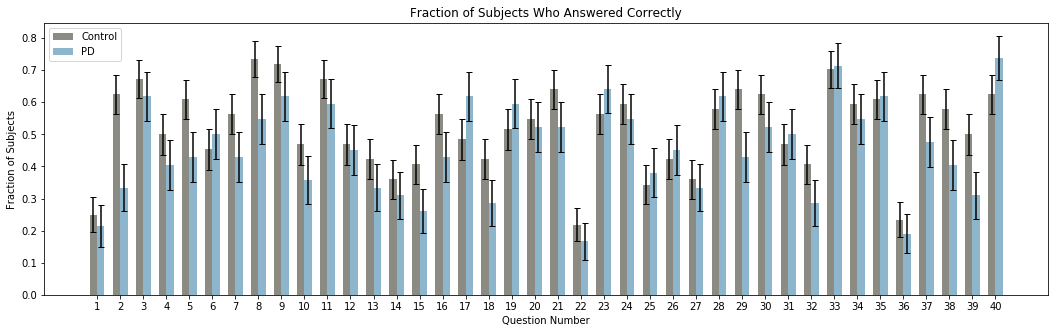

In [39]:
# The plot shows that only a handful of questions were answered correctly more often by those with PD

fig, ax = plt.subplots(figsize=(18, 5))

# Create the scatter plot

# Arrange the groups along the x axis
N = len(totalsPD.columns)
ind = np.arange(N)

# Choose the width of the bars
width = .32       

# Plot the bar plot with the errors
p1 = plt.bar(ind, bar1frac, width, yerr=xerr, align='center', color='#8B8B83', capsize=3, ecolor='k')
p2 = plt.bar(ind + width, bar2frac, width, yerr=yerr, align='center', color='#8DB6CD', capsize=3, ecolor='k')

# Format the plot
ax.set_title('Fraction of Subjects Who Answered Correctly')
plt.ylabel('Fraction of Subjects')
plt.xlabel('Question Number')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(totalsPD.columns)

ax.legend((p1[0], p2[0]), ('Control', 'PD'), loc=2)

plt.show()

# Scatter Plot

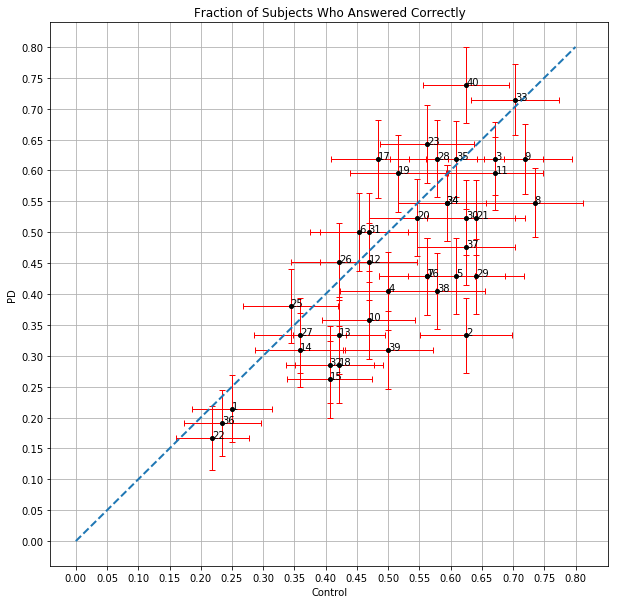

In [40]:
# Create the scatter plot
fig, ax = plt.subplots(figsize=(10, 10))

x = bar1frac # Control
y = bar2frac # PD
n = totalsPD.columns # Question Number

# Plot a scatterplot with error bars
ax.errorbar(x, y, xerr, yerr, fmt='ko', ecolor='red', capsize=3, ms=4, elinewidth=1)

# Plot a dotted line where Control and PD are equal
ax.plot(np.linspace(0,.8), np.linspace(0,.8) , linestyle='dashed', linewidth=2)

# Label each point with the corresponding Question Number
# I think there is a package I can use to make the annotations not overlap if needed
for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))
    
# Label the graph
plt.xlabel('Control')
plt.ylabel('PD')
plt.title('Fraction of Subjects Who Answered Correctly')

# Make the axes have the same scale
plt.xticks(np.linspace(0,.8, num=17))
plt.yticks(np.linspace(0,.8, num=17))

plt.grid()
plt.show()

# Support Vector Machine

In [41]:
# Make one complete DF and only include the Response columns
finalJoined = NoPD.append(PD)
finalJoinedR = finalJoined.iloc[ : , 0 : start]
finalJoinedR.head(finalJoined.shape[0])

,01_RE,02_RE,03_RE,04_RE,05_RE,06_RE,07_RE,08_RE,09_RE,10_RE,...,31_RE,32_RE,33_RE,34_RE,35_RE,36_RE,37_RE,38_RE,39_RE,40_RE
10362,3,1,3,2,4,2,3,2,4,2,...,4,4,3,3,4,2,1,4,2,1
10405,4,3,3,3,2,1,2,2,4,3,...,1,3,2,1,4,2,3,4,2,1
10606,4,2,4,3,3,4,1,2,3,3,...,4,1,2,1,2,4,2,2,2,1
10662,1,2,3,4,3,2,1,2,3,4,...,2,3,1,4,2,3,1,4,2,3
10663,1,3,4,4,3,3,1,2,4,2,...,4,3,3,1,2,4,1,4,2,4
10672,4,2,1,3,1,3,3,4,2,4,...,1,4,4,1,4,4,4,4,4,3
10765,4,4,4,4,4,4,4,2,4,2,...,3,4,4,1,4,4,1,2,4,1
11247,2,2,4,4,3,2,1,2,3,2,...,4,3,3,1,4,3,1,4,2,1
11613,2,2,4,1,2,2,3,2,3,2,...,2,3,3,1,4,1,1,2,3,1
11951,4,1,4,4,3,3,4,4,3,2,...,1,2,1,1,2,3,1,1,1,2


In [42]:
# Separate data into X and y
yList = finalJoined['PRIMDIAG2'].tolist()
yInts = [int(float(s)) for s in yList]
y = np.asarray(yInts)
print(y)

X = finalJoinedR.astype(object)
X = pd.get_dummies(X, drop_first = False)
print(list(finalJoined.loc[X.index]['PRIMDIAG2']) == finalJoined['PRIMDIAG2'].tolist())
X = X.values
print(X)
      
#for col in X.columns:
    #print(X[col])
    #X[col] = X[col].astype(object)
    #print(X[col])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
True
[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


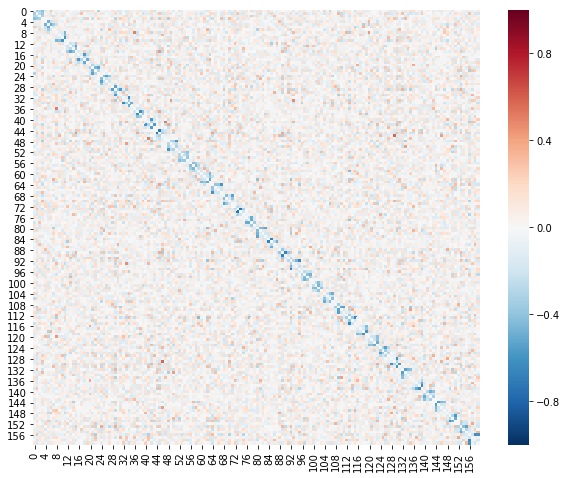

In [43]:
# Rick's Notes to check for colinearity
import seaborn as sns
plt.figure(figsize=(10,8))
X_corr = pd.DataFrame(X).corr()
for i in range(X_corr.shape[0]):
    X_corr.iloc[i,i] = 0
sns.heatmap(X_corr,vmin=-1,vmax=1,cmap='RdBu_r')

In [44]:
# Split the data using stratified split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import RepeatedStratifiedKFold
ss = ShuffleSplit(n_splits = 25, test_size=0.25, random_state=0)
rskf = RepeatedStratifiedKFold()

The best parameters are {'C': 1.0, 'gamma': 0.01} with a score of 0.60


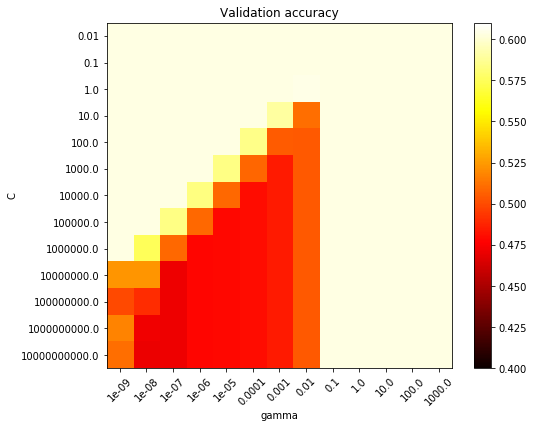

In [45]:
# Create the parameter grid search heat map

# Import cross validation method, scoring methods to tune hyperparameters
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import f1_score
from matplotlib.colors import Normalize
from sklearn.preprocessing import StandardScaler

# Utility function to move the midpoint of a colormap to be around
# the values of interest.

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, yf = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, yf))
    
# Train Classifiers

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=rskf)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))


scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))

# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,vmin=0.4,vmax=0.61)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()

In [46]:
# Check the cross val score using optimal C and gamma
svm = SVC(C=1, gamma = 0.01)
cross_val_score(svm,X,y,cv=rskf).mean()

0.603982683982684

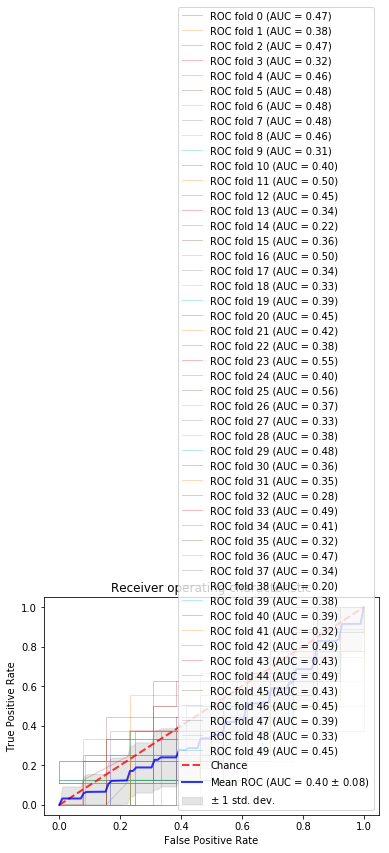

In [47]:
# Create the ROC curves
from sklearn.metrics import roc_curve, auc
from scipy import interp

svm = SVC(C=0.1, gamma = 0.01, probability=True)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in rskf.split(X, y):
    probas_ = svm.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [48]:
# Make one complete DF and only include the Correct columns
finalJoinedC = finalJoined.iloc[ : , start : end+1]
finalJoinedC.head(finalJoined.shape[0])

,01_C,02_C,03_C,04_C,05_C,06_C,07_C,08_C,09_C,10_C,...,31_C,32_C,33_C,34_C,35_C,36_C,37_C,38_C,39_C,40_C
10362,0,0,0,0,0,1,0,1,0,1,...,1,0,1,0,1,0,1,1,1,1
10405,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,1,0,0,1,1,1
10606,0,1,1,0,1,0,1,1,1,0,...,1,0,0,1,0,1,0,0,1,1
10662,0,1,0,1,1,1,1,1,1,0,...,0,1,0,0,0,0,1,1,1,0
10663,0,0,1,1,1,0,1,1,0,1,...,1,1,1,1,0,1,1,1,1,0
10672,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,1,0,0
10765,0,0,1,1,0,0,0,1,0,1,...,0,0,0,1,1,1,1,0,0,1
11247,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
11613,1,1,1,0,0,1,0,1,1,1,...,0,1,1,1,1,0,1,0,0,1
11951,0,0,1,1,1,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,0


In [49]:
# Separate data into X and y
yList = finalJoined['PRIMDIAG2'].tolist()
yInts = [int(float(s)) for s in yList]
y = np.asarray(yInts)
print(y)

X = finalJoinedC
print(list(finalJoined.loc[X.index]['PRIMDIAG2']) == finalJoined['PRIMDIAG2'].tolist())
X = X.values
print(X)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
True
[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 1 1 ... 0 1 1]
 ...
 [0 1 1 ... 1 1 1]
 [0 1 1 ... 1 1 1]
 [0 1 0 ... 1 0 1]]


The best parameters are {'C': 10000000.0, 'gamma': 1e-09} with a score of 0.60


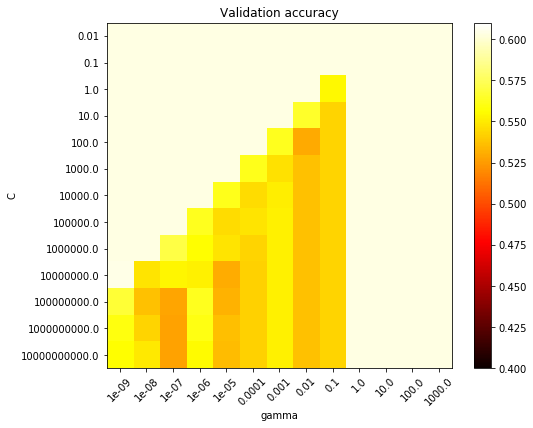

In [50]:
# Create the parameter grid search heat map for tuning hyperparameters
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=rskf)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))


scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))

# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,vmin=0.4,vmax=0.61)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()

In [51]:
# Check the cross val score using optimal parameters
svm = SVC(C=1, gamma = 0.01)
cross_val_score(svm,X,y,cv=rskf).mean()

0.603982683982684

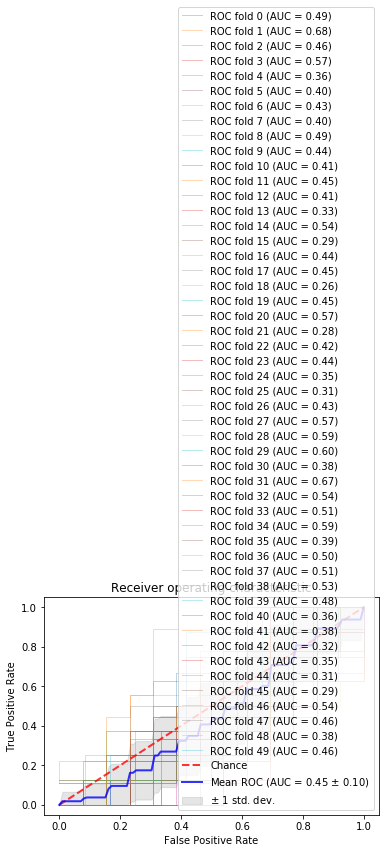

In [52]:
# Create the ROC curves
from sklearn.metrics import roc_curve, auc
from scipy import interp

svm = SVC(C=0.1, gamma = 0.01, probability=True)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in rskf.split(X, y):
    probas_ = svm.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()